### Question 1 (SLR):  Consider the `marketing` data set (in R package `datarium` ). 
The data set `marketing` contains the impact of three advertising medias (youtube, facebook and newspaper) on sales. Data are the advertising budget in thousands of dollars along with the sales. The advertising experiment has been repeated 200 times with different budgets (in thousands of dollar) and the observed sales have been recorded. We want to predict future `sales` (response variable) on the basis of advertising budget spent on `youtube` (explanatory variable).


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
marketing=pd.read_csv("marketing.csv")

(1) Create a scatter plot displaying the sales units versus youtube advertising budget.

<Axes: xlabel='sales', ylabel='youtube'>

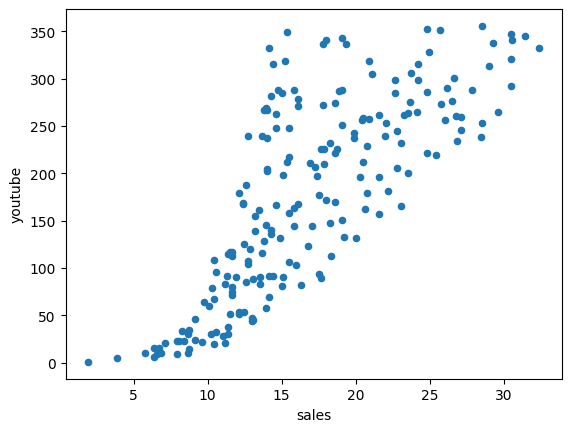

In [2]:
marketing.plot(kind="scatter", x="sales", y="youtube")

(2) It seems there is a linear relationship between the two variables from (1). Create a scatter plot displaying the two variables with a fitted regression line on it.

<Axes: xlabel='sales', ylabel='youtube'>

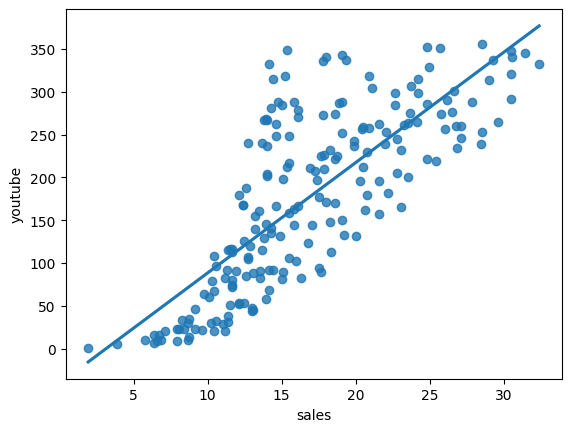

In [3]:
sns.regplot(data=marketing,x='sales', y='youtube',ci=None)

(3) Fit the simple linear regression model. Is the model useful at significance level 0.01? (Hint: the model is useful means $H_0: \beta_1=0$ is rejected).
**ANS:** 

In [4]:
from statsmodels.formula.api import ols
model1 = ols("youtube ~ sales", marketing).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                youtube   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           1.47e-42
Time:                        09:18:38   Log-Likelihood:                -1115.6
No. Observations:                 200   AIC:                             2235.
Df Residuals:                     198   BIC:                             2242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -40.1403     13.076     -3.070      0.0

The p-value for sales is less than 0.01, so the model is useful

(4)  Find a 99% confidence interval of $\beta_1$. \
**ANS:** 

In [5]:
conf_int_99 = model1.conf_int(alpha=0.01)  # alpha = 1 - confidence level
conf_int_99.head()

,0,1
Intercept,-74.150350,-6.130196
sales,10.976789,14.766513


We are 99% confident the value of $\beta_1$ lies between 10.98 and 14.77

(5) Obtain the ANOVA table for the model.

In [6]:
import statsmodels.api as sm
anova = sm.stats.anova_lm(model1)
print(anova)

             df        sum_sq       mean_sq           F        PR(>F)
sales       1.0  1.292414e+06  1.292414e+06  312.144994  1.467390e-42
Residual  198.0  8.198050e+05  4.140430e+03         NaN           NaN


(6) Find the value of the Coefficient of Determination.\
**ANS:** 

In [7]:
print(model1.rsquared)

0.611875050850071


(7) The company plans to spend 310 (in thousands of dollar) on youtube advertising, what is the expected sales?  Find a 99% confidence interval of the 'true' average sales and a 99% prediction confidence interval of the 'true' sales. \

**ANS:**

In [8]:
import statsmodels.formula.api as smf

model = smf.ols("sales ~ youtube", data=marketing).fit()

new_data = pd.DataFrame({'youtube': [310]})

# Get prediction summary frame with 99% confidence intervals
prediction = model.get_prediction(new_data).summary_frame(alpha=0.01)

# Extract values
expected_sales = prediction["mean"].values[0]
mean_ci_lower = prediction["mean_ci_lower"].values[0]
mean_ci_upper = prediction["mean_ci_upper"].values[0]
obs_ci_lower = prediction["obs_ci_lower"].values[0]
obs_ci_upper = prediction["obs_ci_upper"].values[0]

(
    expected_sales,
    (mean_ci_lower, mean_ci_upper),
    (obs_ci_lower, obs_ci_upper)
)

(np.float64(23.175470793189355),
 (np.float64(21.99622667488927), np.float64(24.354714911489438)),
 (np.float64(12.936856205363013), np.float64(33.414085381015695)))

we are 99% confident the average sales will fall in the range of 21.996 to 24.355 across multiple campaigns

We are 99% confident the average sales will fall in the range of 12.94 to 33.41 in one campaign

#### Question 2: Multiple Linear Regression Models
Consider the Auto MPG data set (http://archive.ics.uci.edu/ml/datasets/auto%20mpg). Let the variable `mpg` be the response variable.  For description of the data set, please go to https://archive.ics.uci.edu/ml/datasets/auto+mpg.


In [13]:
import pandas as pd
columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
data=pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', header=None, names=columns)


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\rowme\AppData\Local\Temp\ipykernel_21760\3917817545.py:3: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', header=None, names=columns)


(1) Clean the data by removing all missing values.

In [15]:
data['horsepower'].replace('?', pd.NA, inplace=True)
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')
clean_data = data.dropna()

C:\Users\rowme\AppData\Local\Temp\ipykernel_21760\1521967043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['horsepower'].replace('?', pd.NA, inplace=True)


(2) Use Scatterplot Matrix to check the relationship among the first five numerical variables: 'mpg','displacement','horsepower','weight','acceleration'.

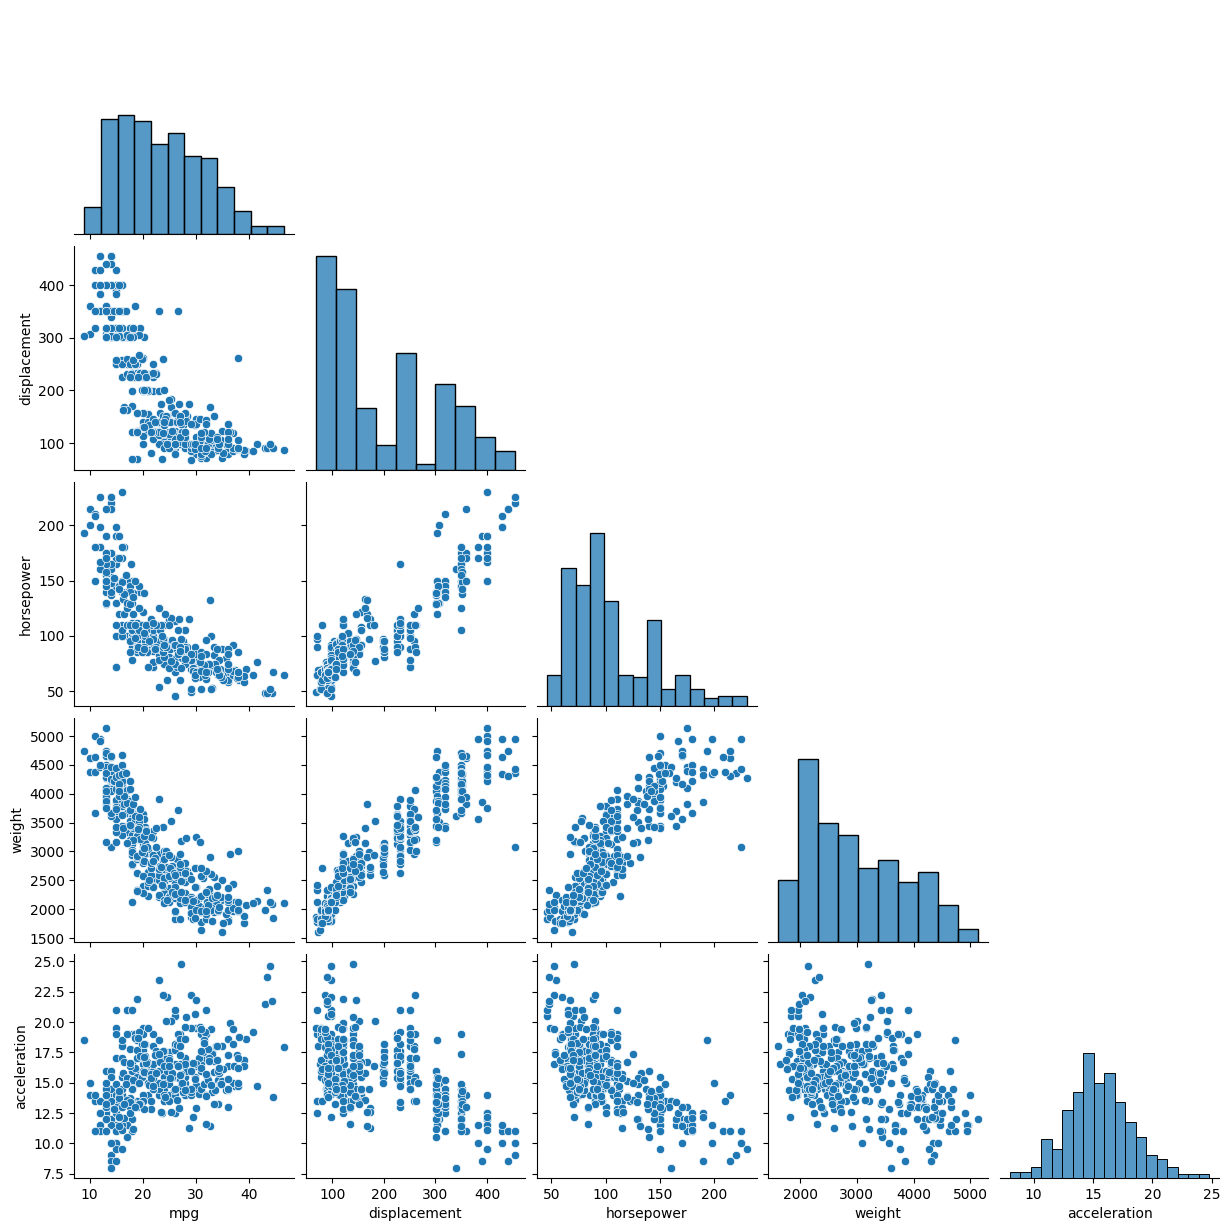

In [16]:
scatter_data = clean_data[["mpg", "displacement", "horsepower", "weight", "acceleration"]]

sns.pairplot(scatter_data, diag_kind="hist", corner=True)
plt.show()

(3) Fit a MLR model with covariates displacement, horsepower, weight, and acceleration.   Is the model as shown by the F-test useful at significance level 0.01?

**Ans**:  

In [17]:
# "displacement", "horsepower", "weight", "acceleration"
mlr_model = smf.ols("mpg ~ displacement + horsepower + weight + acceleration", data=clean_data).fit()
# model2=ols('mpg~displacement+horsepower+weight+acceleration', clean_data).fit()
print(mlr_model.summary())
# print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          9.63e-102
Time:                        09:22:34   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       45.2511      2.456     18.424   

The f-statistic is 9.63e-102, which is lower than 0.01, so the model is useful

(4) Do all variables contribute to the model significantly by their respective t-test?  Test the significance of the variables **jointly** if their individual t-test have large p-values.

**Ans**:  displacement and acceleration are greater than 0.01, meaning those variables dont contribute meaningfully to the model

In [18]:
# testing jointly

reduced_model = smf.ols("mpg ~ weight", data=clean_data).fit()

# Perform partial F-test
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(reduced_model, mlr_model)
print(anova_results)

   df_resid          ssr  df_diff     ss_diff         F    Pr(>F)
0     390.0  7321.233706      0.0         NaN       NaN       NaN
1     387.0  6979.413203      3.0  341.820503  6.317844  0.000342


Since the p-value is less than 0.05, the excluded variables dont significantly contribute to the final value

(5) Remove the nonsignifcant variables and refit a MLR model with the remaining predictors in the model. Are all variables significant at significance level 0.01?.

**Ans:** 

In [19]:
# Reduced model (only significant predictors)
reduced_model = smf.ols("mpg ~ horsepower + weight", data=clean_data).fit()
print(reduced_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          3.06e-104
Time:                        10:05:50   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.0

All remaining variables are significant at the 0.01 significance level

(6) Add the categorical variable `cylinders` to the model in (5). What is the fitted regression equation for cars with 5 cylinders?

**Ans:** 

In [22]:
# Add categorical cylinders to the model

model_with_cyl = smf.ols("mpg ~ horsepower + weight + C(cylinders)", data=clean_data).fit()
print(model_with_cyl.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     184.6
Date:                Fri, 11 Apr 2025   Prob (F-statistic):          5.34e-110
Time:                        10:11:45   Log-Likelihood:                -1095.6
No. Observations:                 392   AIC:                             2205.
Df Residuals:                     385   BIC:                             2233.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            37.7042      2.44

In [24]:
# Get coefficients as a dictionary
coeffs = model_with_cyl.params.to_dict()

# Optional: pretty-print the equation for a specific group (e.g., 5 cylinders)
intercept = coeffs['Intercept']
cyl_5 = coeffs.get('C(cylinders)[T.5]', 0)  # use 0 if key not present
horsepower_coef = coeffs['horsepower']
weight_coef = coeffs['weight']

# Final intercept for 5-cylinder cars
final_intercept = intercept + cyl_5

# Print formatted regression equation
print(f"Regression equation: mpg = {final_intercept:.4f} "
      f"+ ({horsepower_coef:.4f}) * horsepower "
      f"+ ({weight_coef:.4f}) * weight")

Regression equation: mpg = 46.7598 + (-0.0608) * horsepower + (-0.0046) * weight
